In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
x= np.linspace(0,50,501)

In [22]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [23]:
y = np.sin(x)

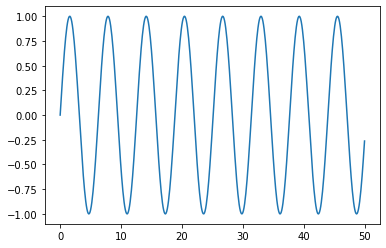

In [24]:
plt.plot(x,y)

In [25]:
df = pd.DataFrame(data=y,index=x,columns=['sine'])

In [26]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [27]:
len(df)

501

In [28]:
test_percent = 0.1

In [29]:
len(df)*test_percent

50.1

In [30]:
test_point = np.round(len(df)*test_percent)

In [31]:
test_ind = int(len(df)-test_point)

In [87]:
train = df.iloc[:test_ind]
len(train)

451

In [86]:
test = df.iloc[test_ind:]
len(test)

50

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(train)

MinMaxScaler()

In [37]:
scaled_train = scaler.transform(train)

In [38]:
scaled_test = scaler.transform(test)

In [39]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
#help(TimeseriesGenerator)

In [55]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [56]:
len(scaled_train)

451

In [57]:
len(generator)

401

In [58]:
X,y=generator[0]

In [59]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [60]:
y

array([[0.02053313]])

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [62]:
n_features = 1

In [63]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length,n_features)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [64]:
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 3s 5ms/step - loss: 0.0066
Epoch 2/5
401/401 [==============================] - 2s 5ms/step - loss: 4.2202e-04
Epoch 3/5
401/401 [==============================] - 2s 5ms/step - loss: 4.6083e-05
Epoch 4/5
401/401 [==============================] - 2s 5ms/step - loss: 7.7723e-04
Epoch 5/5
401/401 [==============================] - 2s 5ms/step - loss: 4.1454e-05


In [65]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

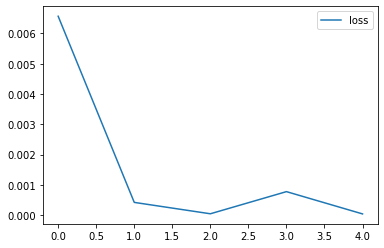

In [66]:
losses.plot()

In [67]:
first_eval_batch = scaled_train[-length:]

In [70]:
first_eval_batch =first_eval_batch.reshape((1,length,n_features))

In [71]:
model.predict(first_eval_batch)

array([[0.95927763]], dtype=float32)

In [73]:
scaled_test[0]

array([0.94955134])

In [77]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [78]:
test_predictions

[array([0.95927763], dtype=float32),
 array([0.9786206], dtype=float32),
 array([0.9971436], dtype=float32),
 array([1.0091068], dtype=float32),
 array([1.0154926], dtype=float32),
 array([1.0184363], dtype=float32),
 array([1.0131897], dtype=float32),
 array([1.0051875], dtype=float32),
 array([0.988994], dtype=float32),
 array([0.96999973], dtype=float32),
 array([0.94576627], dtype=float32),
 array([0.91705483], dtype=float32),
 array([0.88572913], dtype=float32),
 array([0.84951097], dtype=float32),
 array([0.8124984], dtype=float32),
 array([0.77026975], dtype=float32),
 array([0.7286757], dtype=float32),
 array([0.6830376], dtype=float32),
 array([0.63629806], dtype=float32),
 array([0.589934], dtype=float32),
 array([0.53940153], dtype=float32),
 array([0.49214515], dtype=float32),
 array([0.4410838], dtype=float32),
 array([0.39360914], dtype=float32),
 array([0.3448327], dtype=float32),
 array([0.29766273], dtype=float32),
 array([0.2546078], dtype=float32),
 array([0.21017852

In [80]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.91854966],
       [ 0.95723526],
       [ 0.99428104],
       [ 1.01820711],
       [ 1.03097861],
       [ 1.03686607],
       [ 1.02637288],
       [ 1.01036868],
       [ 0.97798192],
       [ 0.93999369],
       [ 0.89152715],
       [ 0.83410474],
       [ 0.77145385],
       [ 0.69901809],
       [ 0.62499353],
       [ 0.54053693],
       [ 0.45734954],
       [ 0.36607399],
       [ 0.2725957 ],
       [ 0.17986831],
       [ 0.0788042 ],
       [-0.0157078 ],
       [-0.11782971],
       [-0.21277825],
       [-0.31033036],
       [-0.40466951],
       [-0.4907787 ],
       [-0.57963653],
       [-0.65267366],
       [-0.72872869],
       [-0.78897368],
       [-0.84711024],
       [-0.89504315],
       [-0.92879826],
       [-0.96520607],
       [-0.97560825],
       [-0.99419246],
       [-0.98807254],
       [-0.98092832],
       [-0.96362581],
       [-0.92803849],
       [-0.90139505],
       [-0.84092583],
       [-0.79894888],
       [-0.72575933],
       [-0

In [81]:
test['predictions'] = true_predictions

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9004/349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


<AxesSubplot:>

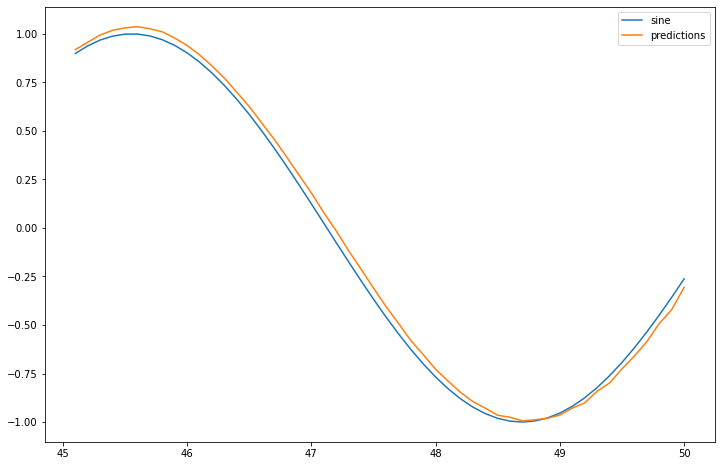

In [84]:
test.plot(figsize= (12,8))

In [85]:
len(scaled_test)

50

In [90]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [91]:
length = 49

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [92]:
model = Sequential()
model.add(LSTM(49, input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [93]:
model.fit(generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])

Epoch 1/20
402/402 [==============================] - 6s 11ms/step - loss: 0.0173 - val_loss: 5.8392e-05
Epoch 2/20
402/402 [==============================] - 4s 9ms/step - loss: 6.7573e-05 - val_loss: 4.1759e-05
Epoch 3/20
402/402 [==============================] - 4s 10ms/step - loss: 1.5660e-04 - val_loss: 4.6680e-05
Epoch 4/20
402/402 [==============================] - 4s 9ms/step - loss: 3.1697e-04 - val_loss: 4.0436e-05
Epoch 5/20
402/402 [==============================] - 4s 9ms/step - loss: 5.3813e-05 - val_loss: 7.4271e-06
Epoch 6/20
402/402 [==============================] - 4s 9ms/step - loss: 1.5701e-04 - val_loss: 1.4709e-05
Epoch 7/20
402/402 [==============================] - 4s 9ms/step - loss: 1.3806e-04 - val_loss: 4.7826e-06
Epoch 8/20
402/402 [==============================] - 4s 9ms/step - loss: 4.7012e-05 - val_loss: 1.5912e-04
Epoch 9/20
402/402 [==============================] - 4s 9ms/step - loss: 7.3785e-05 - val_loss: 8.5199e-05


In [102]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9004/3886279277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM predictions'] =true_predictions


<AxesSubplot:>

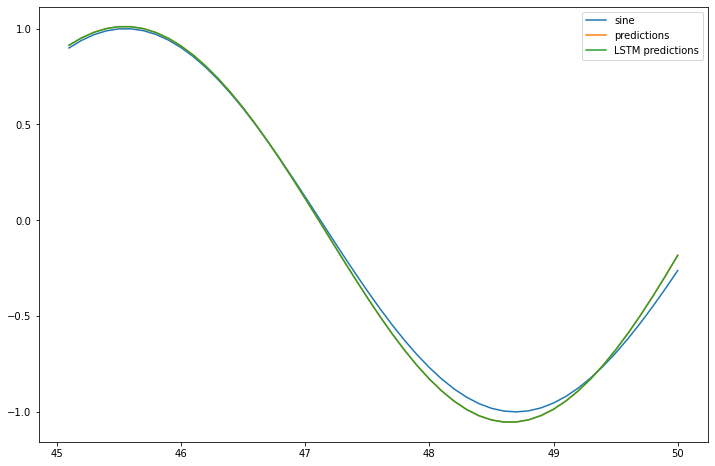

In [103]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM predictions'] =true_predictions
test.plot(figsize = (12,8))

In [105]:
len(df)

501

In [107]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [108]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length , batch_size = 1)

In [109]:
model = Sequential()

model.add(LSTM(50, input_shape= (length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss = 'mse')

In [110]:
model.fit(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 6s 9ms/step - loss: 0.0127
Epoch 2/6
452/452 [==============================] - 4s 9ms/step - loss: 2.1554e-04
Epoch 3/6
452/452 [==============================] - 4s 9ms/step - loss: 3.8087e-05
Epoch 4/6
452/452 [==============================] - 4s 9ms/step - loss: 1.5394e-04
Epoch 5/6
452/452 [==============================] - 4s 9ms/step - loss: 1.3629e-04
Epoch 6/6
452/452 [==============================] - 4s 9ms/step - loss: 1.2669e-04


In [111]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
    
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [112]:
forecast = scaler.inverse_transform(forecast)

In [113]:
forecast

array([[ 0.94020075],
       [ 0.98469371],
       [ 1.02153612],
       [ 1.04964234],
       [ 1.06851708],
       [ 1.07787183],
       [ 1.07758764],
       [ 1.06768524],
       [ 1.04830626],
       [ 1.01969316],
       [ 0.98217591],
       [ 0.93615983],
       [ 0.88211375],
       [ 0.82056482],
       [ 0.75208976],
       [ 0.67731169],
       [ 0.59689625],
       [ 0.51154761],
       [ 0.42200678],
       [ 0.32904943],
       [ 0.23348416],
       [ 0.13614889],
       [ 0.03791026],
       [-0.06034006],
       [-0.15768845]])

In [114]:
forecast_index = np.arange(50.1,52.6, step=0.1)

In [115]:
len(forecast_index)

25

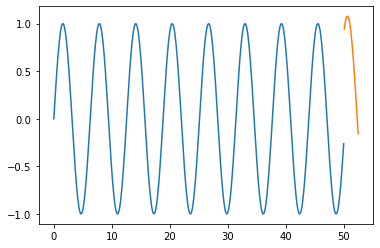

In [118]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)
